In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Depreciated Feature Engineering all done in Pipeline Preprocess

In [2]:
data_df = pd.read_csv("../cab_rides.csv")
weather_df = pd.read_csv("../weather.csv")


In [3]:
data_df = data_df[data_df['name'] != 'Taxi']

In [6]:
data_df['date_time'] = pd.to_datetime(data_df['time_stamp'], unit='ms')
weather_df['date_time'] = pd.to_datetime(weather_df['time_stamp'], unit='s')

In [7]:
# Weather
weather_df['is_raining'] = weather_df['rain'].apply(lambda x: 1 if x > 0 else 0)

def group_temp(temp):
    if temp < 30:
        return 20
    elif 30 <= temp < 40:
        return 30
    elif 40 <= temp < 50:
        return 40
    else:  # temp >= 50
        return 50

# Create the temp_groups column
weather_df['temp_groups'] = weather_df['temp'].apply(group_temp)


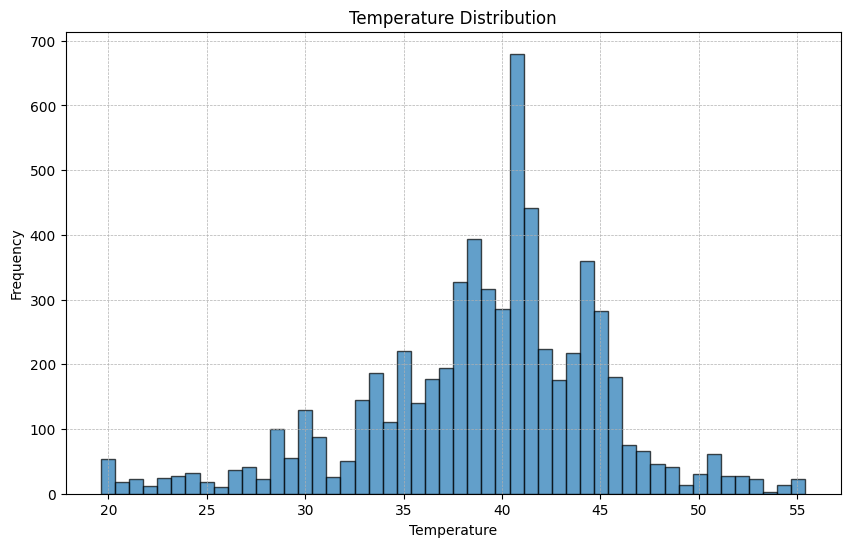

In [8]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10,6))
plt.hist(weather_df['temp'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [9]:
set(data_df['name'])

{'Black',
 'Black SUV',
 'Lux',
 'Lux Black',
 'Lux Black XL',
 'Lyft',
 'Lyft XL',
 'Shared',
 'UberPool',
 'UberX',
 'UberXL',
 'WAV'}

Black/Lux Black/Lux   Black XL/Lux Black Xl     Uber X/Lyft   Lyft XL/Uber XL     UberPool/Shared    WAV    Taxi  

In [10]:

# Ride

def determine_car(car):
    if car == "Black" or car == "Lux Black" or car == "Lux":
        return "Luxury"
    elif car == "Black SUV" or car == "Lux Black XL":
        return "Luxury SUV"
    elif car == "UberX" or car == "Lyft":
        return "Base"
    elif car == "UberXL" or car == "Lyft XL":
        return "Base XL"
    elif car == "UberPool" or car == "Shared":
        return "Shared"
    elif car == "WAV":
        return "Wheel Chair Accessible"
    
# Create the temp_groups column
data_df['car_type'] = data_df['name'].apply(determine_car)


# For 'weekday' column: 1 if it's a weekday, 0 otherwise
data_df['weekday'] = data_df['date_time'].dt.weekday.apply(lambda x: 1 if 0 <= x <= 4 else 0)

# For 'rush_hour' column: 1 if it's rush hour, 0 otherwise
def is_rush_hour(time_obj):
    morning_rush = (time_obj >= pd.Timestamp(time_obj.date()).replace(hour=7)) and (time_obj <= pd.Timestamp(time_obj.date()).replace(hour=9))
    evening_rush = (time_obj >= pd.Timestamp(time_obj.date()).replace(hour=16)) and (time_obj <= pd.Timestamp(time_obj.date()).replace(hour=18))
    return int(morning_rush or evening_rush)

data_df['rush_hour'] = data_df['date_time'].apply(is_rush_hour)




In [11]:
min_date = data_df['date_time'].min()
max_date = data_df['date_time'].max()

print(f"The range of dates is from {min_date} to {max_date}.")


The range of dates is from 2018-11-26 03:40:46.318000 to 2018-12-18 19:15:10.943000.


In [12]:
set(data_df['destination'])

{'Back Bay',
 'Beacon Hill',
 'Boston University',
 'Fenway',
 'Financial District',
 'Haymarket Square',
 'North End',
 'North Station',
 'Northeastern University',
 'South Station',
 'Theatre District',
 'West End'}

In [13]:
merged_df = pd.merge_asof(data_df.sort_values('date_time'), 
                          weather_df.sort_values('date_time'), 
                          on='date_time', 
                          left_by='source', 
                          right_by='location',
                          direction='nearest')

In [14]:
columns = list(merged_df.columns)

In [20]:
final_columns = [
 'date_time',
 'distance',
 'cab_type',
 'source',
 'destination',
 'car_type',
 'weekday',
 'rush_hour',
 'is_raining',
 'temp_groups',
 'surge_multiplier',
 'price',
]

In [21]:
final_df = merged_df[final_columns]

In [22]:
final_df.to_csv("base_cleaned.csv")